# Regridding

In [1]:
%reload_ext autoreload

%autoreload 2

import os

import iris
import matplotlib.pyplot as plt
import metpy
import numpy as np
import xarray as xr

from ml_downscaling_emulator.utils import cp_model_rotated_pole, platecarree

In [4]:
lssnow_path = f'../../../../data/moose/uk/2.2km/rcp85/01/lssnow/day/lssnow_rcp85_land-cpm_uk_2.2km_01_day_19801201-19811130.nc'
lsrain_path = f'../../../../data/moose/uk/2.2km/rcp85/01/lsrain/day/lsrain_rcp85_land-cpm_uk_2.2km_01_day_19801201-19811130.nc'

lssnow_ds = xr.open_dataset(lssnow_path)
lsrain_ds = xr.open_dataset(lsrain_path)

In [5]:
iris.load_cube(lssnow_path)

<iris 'Cube' of stratiform_snowfall_flux / (kg m-2 s-1) (time: 360; grid_latitude: 654; grid_longitude: 532)>

In [6]:
iris.load_cube(lsrain_path)

<iris 'Cube' of stratiform_rainfall_flux / (kg m-2 s-1) (time: 360; grid_latitude: 654; grid_longitude: 532)>

In [9]:
coarse_lssnow_ds = lssnow_ds.coarsen(grid_latitude=16, grid_longitude=16, boundary='trim').mean()
coarse_lsrain_ds = lsrain_ds.coarsen(grid_latitude=16, grid_longitude=16, boundary='trim').mean()

coarse_lssnow_ds.to_netcdf('lssnow16x.nc')
coarse_lsrain_ds.to_netcdf('lsrain16x.nc')

In [10]:
iris.load_cube('lssnow16x.nc')

<iris 'Cube' of stratiform_snowfall_flux / (kg m-2 s-1) (time: 360; grid_latitude: 40; grid_longitude: 33)>

In [11]:
iris.load_cube('lsrain16x.nc')

<iris 'Cube' of stratiform_rainfall_flux / (kg m-2 s-1) (time: 360; grid_latitude: 40; grid_longitude: 33)>

In [29]:
coarse_lssnow_ds['stratiform_snowfall_flux'].attrs

{'standard_name': 'stratiform_snowfall_flux',
 'units': 'kg m-2 s-1',
 'um_stash_source': 'm01s04i204',
 'cell_methods': 'time: mean (interval: 1 hour)',
 'grid_mapping': 'rotated_latitude_longitude'}

In [34]:
lssnow_ds['stratiform_snowfall_flux']

<xarray.DataArray 'stratiform_snowfall_flux' (time: 360, grid_latitude: 654,
                                              grid_longitude: 532)>
array([[[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [9.457474e-07, 5.459931e-07, ..., 7.213005e-07, 9.174561e-07],
        [7.755622e-07, 4.736252e-07, ..., 6.097668e-07, 7.531841e-07]],

       [[2.109888e-09, 5.719765e-10, ..., 0.000000e+00, 0.000000e+00],
        [6.198896e-10, 1.865221e-10, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [2.824936e-08, 3.455177e-08, ..., 6.288276e-06, 6.241119e-06],
        [3.404821e-08, 3.865005e-08, ..., 6.422429e-06, 5.792808e-06]],

       ...,

       [[0.000000e+00, 0.000000e+00, ..., 2.093158e-08, 2.542753e-08],
        [0.000000e+00, 0.000000e+00, ..., 1.970315e-08, 2.426166e-08],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 9.379335e-06, 7.287363e-06],
        [0.000000e+00, 0.000000e+00, ..., 8.387377e-06, 6.175492e-06]],

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [7.428176e-08, 1.713163e-07, ..., 4.483850e-06, 4.019430e-06],
        [1.619305e-08, 6.799042e-08, ..., 3.852695e-06, 3.217330e-06]]],
      dtype=float32)
Coordinates:
  * time                     (time) object 1980-12-01 12:00:00 ... 1981-11-30...
  * grid_latitude            (grid_latitude) float32 -5.547 -5.511 ... 8.927
  * grid_longitude           (grid_longitude) float32 353.1 353.1 ... 365.2
    forecast_period          (time) timedelta64[ns] 450 days 12:00:00 ... 809...
    forecast_reference_time  object 1979-09-01 00:00:00
    realization              int32 1100000
Attributes:
    standard_name:    stratiform_snowfall_flux
    units:            kg m-2 s-1
    um_stash_source:  m01s04i204
    cell_methods:     time: mean (interval: 1 hour)
    grid_mapping:     rotated_latitude_longitude

In [30]:
lssnow_ds

<xarray.Dataset>
Dimensions:                     (time: 360, grid_latitude: 654,
                                 grid_longitude: 532, bnds: 2)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 ... 1981-11...
  * grid_latitude               (grid_latitude) float32 -5.547 -5.511 ... 8.927
  * grid_longitude              (grid_longitude) float32 353.1 353.1 ... 365.2
    forecast_period             (time) timedelta64[ns] 450 days 12:00:00 ... ...
    forecast_reference_time     object 1979-09-01 00:00:00
    realization                 int32 1100000
Dimensions without coordinates: bnds
Data variables:
    stratiform_snowfall_flux    (time, grid_latitude, grid_longitude) float32 ...
    rotated_latitude_longitude  int32 -2147483647
    time_bnds                   (time, bnds) object 1980-12-01 00:00:00 ... 1...
    grid_latitude_bnds          (grid_latitude, bnds) float32 ...
    grid_longitude_bnds         (grid_longitude, bnds) float32 ...
    forecast_period_bnds        (time, bnds) float64 1.08e+04 ... 1.944e+04
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

In [25]:
iris.load_cube(lssnow_path).coord_system()

RotatedGeogCS(37.5, 177.5, ellipsoid=GeogCS(6371229.0))

In [64]:
src_cube = coarse_lssnow_ds['stratiform_snowfall_flux'].to_iris()
target_cube = iris.load_cube(lssnow_path)

# src_cube.coord_system = target_cube.coord_system()

src_cube.coords('grid_longitude')[0].coord_system = target_cube.coords('grid_longitude')[0].coord_system
src_cube.coords('grid_latitude')[0].coord_system = target_cube.coords('grid_latitude')[0].coord_system

regridder = iris.analysis.Nearest().regridder(src_cube, target_cube)
output_cube = regridder(src_cube)
# output_cube.coords('grid_longitude')[0].coord_system = target_cube.coords('grid_longitude')[0].coord_system
# output_cube.coords('grid_latitude')[0].coord_system = target_cube.coords('grid_latitude')[0].coord_system


TypeError: 'NoneType' object is not iterable

In [65]:
xr.DataArray.from_iris(output_cube).to_netcdf('regridlssnow.nc')
iris.load_cube('regridlssnow.nc')

<iris 'Cube' of stratiform_snowfall_flux / (kg m-2 s-1) (time: 360; grid_latitude: 654; grid_longitude: 532)>

In [83]:
lssnow_ds

<xarray.Dataset>
Dimensions:                     (time: 360, grid_latitude: 654,
                                 grid_longitude: 532, bnds: 2)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 ... 1981-11...
  * grid_latitude               (grid_latitude) float32 -5.547 -5.511 ... 8.927
  * grid_longitude              (grid_longitude) float32 353.1 353.1 ... 365.2
    forecast_period             (time) timedelta64[ns] 450 days 12:00:00 ... ...
    forecast_reference_time     object 1979-09-01 00:00:00
    realization                 int32 1100000
Dimensions without coordinates: bnds
Data variables:
    stratiform_snowfall_flux    (time, grid_latitude, grid_longitude) float32 ...
    rotated_latitude_longitude  int32 -2147483647
    time_bnds                   (time, bnds) object 1980-12-01 00:00:00 ... 1...
    grid_latitude_bnds          (grid_latitude, bnds) float32 -5.565 ... 8.945
    grid_longitude_bnds         (grid_longitude, bnds) float32 353.1 ... 365.2
    forecast_period_bnds        (time, bnds) float64 1.08e+04 ... 1.944e+04
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

In [101]:
 lssnow_ds['time_bnds'].encoding

{'zlib': False,
 'shuffle': False,
 'complevel': 0,
 'fletcher32': False,
 'contiguous': True,
 'chunksizes': None,
 'source': '/home/henry/cdt/summer/data/moose/uk/2.2km/rcp85/01/lssnow/day/lssnow_rcp85_land-cpm_uk_2.2km_01_day_19801201-19811130.nc',
 'original_shape': (360, 2),
 'dtype': dtype('float64'),
 'units': 'hours since 1970-01-01 00:00:00',
 'calendar': '360_day'}

In [98]:
nds = xr.Dataset({
        'lssnow': (['time', 'grid_latitude', 'grid_longitude'], xr.DataArray.from_iris(output_cube).values, {'units': 'kg m-2 s-1', 'standard_name': 'lssnow', 'grid_mapping': 'rotated_latitude_longitude'}),
        'rotated_latitude_longitude': ([], lssnow_ds.data_vars['rotated_latitude_longitude'].values, lssnow_ds.data_vars['rotated_latitude_longitude'].attrs),
        'time_bnds': (['time', 'bnds'], lssnow_ds.data_vars['time_bnds'].values, lssnow_ds.data_vars['time_bnds'].attrs, {'units': 'hours since 1970-01-01 00:00:00', 'calendar': '360_day'}),
        'grid_latitude_bnds': (['grid_latitude', 'bnds'], lssnow_ds.data_vars['grid_latitude_bnds'].values, lssnow_ds.data_vars['grid_latitude_bnds'].attrs),
        'grid_longitude_bnds': (['grid_longitude', 'bnds'], lssnow_ds.data_vars['grid_longitude_bnds'].values, lssnow_ds.data_vars['grid_longitude_bnds'].attrs),
        'forecast_period_bnds': (['time', 'bnds'], lssnow_ds.data_vars['forecast_period_bnds'].values, lssnow_ds.data_vars['forecast_period_bnds'].attrs)
    },
    coords=lssnow_ds.coords,
    attrs=lssnow_ds.attrs)

nds.to_netcdf('nds.nc')
iris.load('nds.nc')

[<iris 'Cube' of lssnow / (kg m-2 s-1) (time: 360; grid_latitude: 654; grid_longitude: 532)>]

In [93]:
nds['lssnow'].encoding

{'zlib': False,
 'shuffle': False,
 'complevel': 0,
 'fletcher32': False,
 'contiguous': True,
 'chunksizes': None,
 'source': '/home/henry/cdt/summer/data/moose/uk/2.2km/rcp85/01/lssnow/day/lssnow_rcp85_land-cpm_uk_2.2km_01_day_19801201-19811130.nc',
 'original_shape': (360, 654, 532),
 'dtype': dtype('float32'),
 'coordinates': 'forecast_period forecast_reference_time realization'}

## Regridding from CPM to GCM grid

In [2]:
xwind_cpm_path = '/home/henry/cdt/summer/data/moose/uk/2.2km/rcp85/01/xwind/day/xwind_rcp85_land-cpm_uk_2.2km_01_day_19801201-19811130.nc'
ywind_cpm_path = '/home/henry/cdt/summer/data/moose/uk/2.2km/rcp85/01/ywind/day/ywind_rcp85_land-cpm_uk_2.2km_01_day_19801201-19811130.nc'
xwind_gcm_path = '/home/henry/cdt/summer/data/moose/global/60km/rcp85/01/xwind/day/xwind_rcp85_gcm_global_60km_01_day_19801201-19811130.nc'

In [3]:
xwind_cpm = xr.open_dataset(xwind_cpm_path).sel(pressure=[20, 850]).isel(time=slice(30))
ywind_cpm = xr.open_dataset(ywind_cpm_path).sel(pressure=[20, 850]).isel(time=slice(30))

In [4]:
target_cube = iris.load_cube(xwind_gcm_path)
target_ds = xr.open_dataset(xwind_gcm_path)
scheme = iris.analysis.Nearest()

In [5]:
src_coord_sys = iris.coord_systems.RotatedGeogCS(xwind_cpm["rotated_latitude_longitude"].attrs['grid_north_pole_latitude'], xwind_cpm["rotated_latitude_longitude"].attrs['grid_north_pole_longitude'], ellipsoid=iris.coord_systems.GeogCS(xwind_cpm["rotated_latitude_longitude"].attrs['earth_radius']))
src_lat_name = 'grid_latitude'
src_lon_name = 'grid_longitude'

In [94]:
xwind_src_cube = xwind_cpm['x_wind'].to_iris()
xwind_src_cube.coords(src_lon_name)[0].coord_system = src_coord_sys
xwind_src_cube.coords(src_lat_name)[0].coord_system = src_coord_sys

In [95]:
gcm_regridder = scheme.regridder(xwind_src_cube, target_cube)
cpm_regridder = scheme.regridder(target_cube, xwind_src_cube)

In [96]:
xwind_regridded_da = xr.DataArray.from_iris(gcm_regridder(xwind_src_cube))
xwind_reregridded_da = xr.DataArray.from_iris(cpm_regridder(gcm_regridder(xwind_src_cube)))

In [106]:
ywind_src_cube = ywind_cpm['y_wind'].to_iris()
ywind_src_cube.coords(src_lon_name)[0].coord_system = src_coord_sys
ywind_src_cube.coords(src_lat_name)[0].coord_system = src_coord_sys

ywind_regridded_da = xr.DataArray.from_iris(regridder(ywind_src_cube))
ywind_reregridded_da = xr.DataArray.from_iris(cpm_regridder(gcm_regridder(ywind_src_cube)))

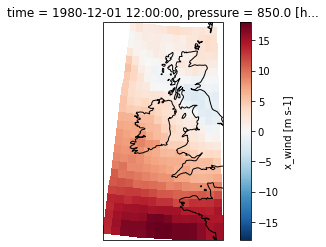

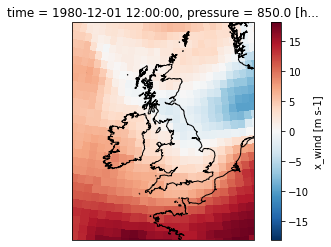

In [104]:
ax = plt.axes(projection=cp_model_rotated_pole)

xwind_regridded_da.isel(time=0, pressure=1).sel(latitude=slice(46,60), longitude=slice(348, 360)).plot(ax=ax, x='longitude', y='latitude', add_colorbar=True, transform=platecarree)

ax.coastlines()

plt.show()

ax = plt.axes(projection=cp_model_rotated_pole)

xwind_reregridded_da.isel(time=0, pressure=1).plot(ax=ax, x='grid_longitude', y='grid_latitude', add_colorbar=True, transform=cp_model_rotated_pole)

ax.coastlines()

plt.show()

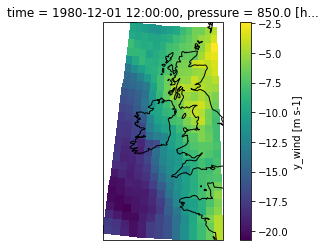

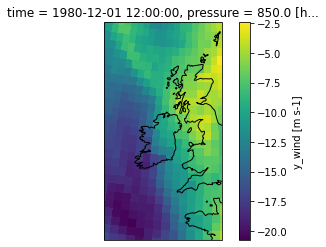

In [110]:
ax = plt.axes(projection=cp_model_rotated_pole)

ywind_regridded_da.isel(time=0, pressure=1).sel(latitude=slice(46,60), longitude=slice(348, 360)).plot(ax=ax, x='longitude', y='latitude', transform=platecarree)

ax.coastlines()

plt.show()

ax = plt.axes(projection=cp_model_rotated_pole)

ywind_reregridded_da.isel(time=0, pressure=1, grid_longitude=slice(0, 360)).plot(ax=ax, x='grid_longitude', y='grid_latitude', add_colorbar=True, transform=cp_model_rotated_pole)

ax.coastlines()

plt.show()

### Check that vorticity is similar when calculated on entire GCM grid

So regridding to GCM then computing vorticity should be similar to coarsening by 27x then computing vorticity

In [111]:
import metpy.calc as mpcalc

In [146]:
vort_da = mpcalc.vorticity(xwind_regridded_da, ywind_regridded_da)

/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/pint/quantity.py:1309: RuntimeWarning: invalid value encountered in true_divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


In [147]:
coarsened_xwind = xwind_cpm['x_wind'].coarsen(grid_longitude=27, grid_latitude=27, boundary='trim').mean()
coarsened_ywind = ywind_cpm['y_wind'].coarsen(grid_longitude=27, grid_latitude=27, boundary='trim').mean()
dx, dy =  mpcalc.lat_lon_grid_deltas(coarsened_xwind.grid_longitude.values, coarsened_xwind.grid_latitude.values)
# make sure grid deltas broadcast properly over time dimension - https://stackoverflow.com/a/55012247
dx = dx[None, None, :]
dy = dy[None, None, :]
vort_cpm_grid_da = mpcalc.vorticity(coarsened_xwind, coarsened_ywind, dx=dx, dy=dy)
# vort_cpm_grid_da.isel(time=0, pressure=1).plot(vmin=-0.0001, vmax=0.0001)

In [155]:
vort_gcm_src_cube = vort_da.to_iris()
vort_gcm_src_cube.coords('latitude')[0].coord_system = iris.coord_systems.GeogCS(xwind_cpm["rotated_latitude_longitude"].attrs['earth_radius'])
vort_gcm_src_cube.coords('longitude')[0].coord_system = iris.coord_systems.GeogCS(xwind_cpm["rotated_latitude_longitude"].attrs['earth_radius'])
coarsened_xwind_cube = coarsened_xwind.to_iris()
coarsened_xwind_cube.coords(src_lon_name)[0].coord_system = src_coord_sys
coarsened_xwind_cube.coords(src_lat_name)[0].coord_system = src_coord_sys
vort_reregridded_da = xr.DataArray.from_iris(scheme.regridder(vort_gcm_src_cube, coarsened_xwind_cube)(vort_gcm_src_cube))

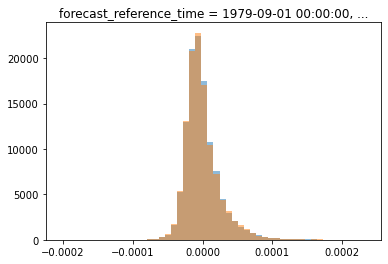

In [184]:
_, bins, _ = vort_cpm_grid_da.plot(density=True, alpha=0.5, bins=50)
_ = vort_reregridded_da.plot(density=True, alpha=0.5, bins=bins)
# vort_da.sel(latitude=slice(46,60), longitude=slice(348, 360)).plot(density=True, alpha=0.3, bins=bins)

#### GCM grid vorticity

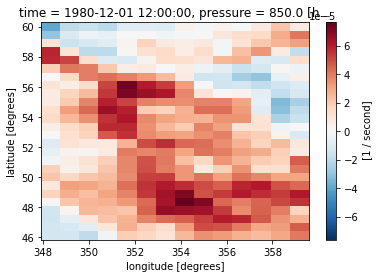

In [149]:
vort_da.isel(time=0, pressure=1).sel(latitude=slice(46,60), longitude=slice(348, 360)).plot()

#### GCM vorticity regrided to coarsened CPM grid

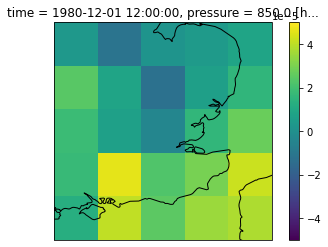

In [190]:
ax = plt.axes(projection=cp_model_rotated_pole)

vort_regridded_da.isel(time=0, pressure=1, grid_latitude=slice(5, 10), grid_longitude=slice(12, 17)).plot(ax=ax, x='grid_longitude', y='grid_latitude', add_colorbar=True, transform=cp_model_rotated_pole, vmin=-5e-5, vmax=5e-5)

ax.coastlines()

#### Coarsened CPM vorticity

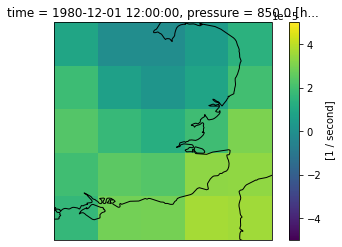

In [192]:
ax = plt.axes(projection=cp_model_rotated_pole)

vort_cpm_grid_da.isel(time=0, pressure=1, grid_latitude=slice(5, 10), grid_longitude=slice(12, 17)).plot(ax=ax, x='grid_longitude', y='grid_latitude', add_colorbar=True, transform=cp_model_rotated_pole, vmin=-5e-5, vmax=5e-5)

ax.coastlines()

In [123]:
coarsened_xwind

<xarray.DataArray 'x_wind' (time: 30, pressure: 2, grid_latitude: 24,
                            grid_longitude: 19)>
array([[[[ 2.07112141e+01,  2.14511700e+01,  2.18971558e+01, ...,
           2.76444645e+01,  2.86978130e+01,  2.95461731e+01],
         [ 2.10453148e+01,  2.16665802e+01,  2.20900974e+01, ...,
           3.02577267e+01,  3.14440098e+01,  3.28935318e+01],
         [ 2.12591286e+01,  2.20738297e+01,  2.26764050e+01, ...,
           3.22312660e+01,  3.34117966e+01,  3.47747688e+01],
         ...,
         [ 3.97556419e+01,  4.05383110e+01,  4.06661377e+01, ...,
           4.27511597e+01,  4.26357079e+01,  4.26856880e+01],
         [ 3.96371155e+01,  4.01270027e+01,  4.02750320e+01, ...,
           4.21254578e+01,  4.22019958e+01,  4.24433975e+01],
         [ 3.90462303e+01,  3.92559967e+01,  3.98120384e+01, ...,
           4.15727310e+01,  4.12772903e+01,  4.16567039e+01]],

        [[ 1.34777212e+01,  1.55004177e+01,  1.61575146e+01, ...,
           1.63469563e+01,  1.69139519e+01,  1.71993427e+01],
         [ 1.32428474e+01,  1.42767906e+01,  1.43680325e+01, ...,
           1.49907751e+01,  1.56348009e+01,  1.64113235e+01],
         [ 1.31410027e+01,  1.28262510e+01,  1.28271494e+01, ...,
           1.36303453e+01,  1.40142689e+01,  1.52712460e+01],
...
           3.93204117e+01,  3.75316963e+01,  3.71114655e+01],
         [ 4.07556534e+01,  4.09249954e+01,  4.10374756e+01, ...,
           3.91886940e+01,  3.87787247e+01,  3.81901512e+01],
         [ 4.13318520e+01,  4.16809998e+01,  4.19284668e+01, ...,
           3.98731575e+01,  3.99151001e+01,  3.96490173e+01]],

        [[ 2.61152878e+01,  2.66378918e+01,  2.67983723e+01, ...,
           1.98872623e+01,  1.83464527e+01,  1.68835773e+01],
         [ 1.86596584e+01,  2.02817955e+01,  2.13897705e+01, ...,
           2.00698299e+01,  1.92028580e+01,  1.79247303e+01],
         [ 1.27913809e+01,  1.46378117e+01,  1.60704727e+01, ...,
           1.97567978e+01,  1.90220890e+01,  1.77896919e+01],
         ...,
         [ 7.80951118e+00,  1.00988483e+01,  1.28026352e+01, ...,
           1.35079327e+01,  1.20949478e+01,  9.68743515e+00],
         [ 5.33600855e+00,  6.92710876e+00,  9.23990059e+00, ...,
           1.04580078e+01,  9.09443188e+00,  5.74430943e+00],
         [-3.20134670e-01,  4.51525539e-01,  2.70662546e-01, ...,
           5.75128460e+00,  5.37572718e+00,  1.00059104e+00]]]],
      dtype=float32)
Coordinates:
  * time                     (time) object 1980-12-01 12:00:00 ... 1980-12-30...
  * pressure                 (pressure) float32 20.0 850.0
  * grid_latitude            (grid_latitude) float32 -5.097 -4.155 ... 8.225
  * grid_longitude           (grid_longitude) float32 353.5 354.5 ... 364.0
    forecast_period          (time) timedelta64[ns] 450 days 12:00:00 ... 479...
    forecast_reference_time  object 1979-09-01 00:00:00
    realization              int32 1100000
Attributes:
    standard_name:    x_wind
    units:            m s-1
    um_stash_source:  m01s30i201
    cell_methods:     time: mean (interval: 1 hour)
    grid_mapping:     rotated_latitude_longitude

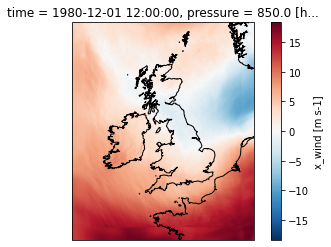

In [81]:
ax = plt.axes(projection=cp_model_rotated_pole)

xwind_cpm['x_wind'].isel(time=0, pressure=1).plot(ax=ax, x='grid_longitude', y='grid_latitude', add_colorbar=True, transform=cp_model_rotated_pole)

ax.coastlines()

plt.show()

In [ ]:
xr.merge([regridded_da.isel(time=0, pressure=1).sel(latitude=slice(50,60), longitude=slice(0, 10)), regridded_da.isel(time=0, pressure=1).sel(latitude=slice(50,60), longitude=slice(350, 360))]).plot